In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#import geopandas
#import descartes
import numpy as np

#import folium
#import seaborn as sns

import os

from scipy.stats import pearsonr

%matplotlib inline

In [2]:
expDF = pd.read_csv('data/BehaviorSpace/phase_01/phase_01.csv')

expDF.rename(columns={'(list (report-crimes-per-hour) (total-crimes))': 'results', 
                      '[step]':'step', '[run number]':'run_number'}, inplace=True)

In [3]:
# Getting the total of robberies
total_robberies_temp = expDF.results.str.split(']', expand=True)
# Converting all values to int and adding to the DF
expDF['num_crimes'] = total_robberies_temp[1].str.strip().astype(int)

In [4]:
# Convert the crimes distribution vector to a python list
expDF['crimes_dist'] = [list(map(int, i.split(' '))) for i in total_robberies_temp[0].str.split('[', expand=True)[2]]
# Delete the column results
expDF.drop(['results'], axis=1, inplace=True)

In [5]:
expDF.head(2)

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,victim-history-sf,attractiveness-sf,num-people,graphics-view,step,num_crimes,crimes_dist
0,3,0.5,0.01,0.3,20,0,0,10000,False,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,0.5,0.01,0.1,20,0,0,10000,False,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
# Get only the final step of the simulation
expDF_Final = expDF[expDF.step == max(expDF.step)]

In [7]:
expDF_Final.reset_index(drop=True, inplace=True)

In [8]:
expDF_Final

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,victim-history-sf,attractiveness-sf,num-people,graphics-view,step,num_crimes,crimes_dist
0,2,0.5,0.01,0.2,20,0,0,10000,False,7200,235,"[29, 11, 9, 8, 31, 24, 14, 16, 12, 14, 6, 4, 2..."
1,3,0.5,0.01,0.3,20,0,0,10000,False,7200,106,"[18, 8, 3, 6, 13, 12, 9, 4, 7, 5, 1, 1, 0, 0, ..."
2,4,0.5,0.01,0.4,20,0,0,10000,False,7200,69,"[18, 3, 3, 5, 6, 7, 3, 5, 3, 5, 0, 0, 1, 0, 0,..."
3,5,0.5,0.01,0.5,20,0,0,10000,False,7200,49,"[11, 3, 4, 3, 5, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0,..."
4,7,0.5,0.01,0.7,20,0,0,10000,False,7200,31,"[6, 0, 0, 2, 2, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
265,266,1.0,0.05,0.5,20,0,0,10000,False,7200,232,"[24, 18, 12, 11, 40, 29, 14, 13, 13, 5, 7, 5, ..."
266,267,1.0,0.05,0.6,20,0,0,10000,False,7200,188,"[21, 7, 10, 8, 21, 27, 15, 10, 10, 4, 7, 3, 0,..."
267,268,1.0,0.05,0.7,20,0,0,10000,False,7200,153,"[7, 6, 9, 11, 23, 16, 10, 14, 9, 4, 3, 3, 2, 0..."
268,269,1.0,0.05,0.8,20,0,0,10000,False,7200,126,"[9, 6, 5, 7, 20, 12, 13, 8, 9, 3, 4, 3, 2, 1, ..."


In [9]:
empData = [13, 13, 19, 19, 9, 9, 2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 4, 4, 9, 9, 25, 25, 19, 19]

In [10]:
corr, p_value = pearsonr(empData, expDF_Final.crimes_dist[0])
corr, p_value

(0.19921287441277988, 0.3506952142656899)

Text(0, 0.5, 'Simulated Data')

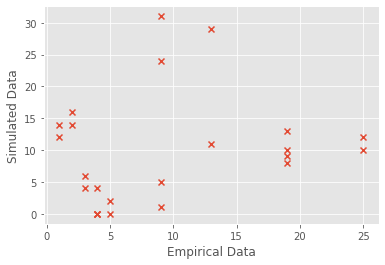

In [11]:
plt.scatter(empData, expDF_Final.crimes_dist[0], marker='x')
plt.xlabel('Empirical Data')
plt.ylabel('Simulated Data')

In [13]:
expDF_Final['corr'] = [pearsonr(empData, row['crimes_dist'])[0] 
                       for index, row in expDF_Final.iterrows() ]
expDF_Final['p_value'] = [pearsonr(empData, row['crimes_dist'])[1] 
                          for index, row in expDF_Final.iterrows() ]

/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
expDF_Final[['crimes_dist','corr', 'p_value']]

,crimes_dist,corr,p_value
0,"[29, 11, 9, 8, 31, 24, 14, 16, 12, 14, 6, 4, 2...",0.199213,0.350695
1,"[18, 8, 3, 6, 13, 12, 9, 4, 7, 5, 1, 1, 0, 0, ...",0.143210,0.504399
2,"[18, 3, 3, 5, 6, 7, 3, 5, 3, 5, 0, 0, 1, 0, 0,...",0.162031,0.449390
3,"[11, 3, 4, 3, 5, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0,...",0.383650,0.064212
4,"[6, 0, 0, 2, 2, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0, ...",0.264499,0.211668
...,...,...,...
265,"[24, 18, 12, 11, 40, 29, 14, 13, 13, 5, 7, 5, ...",0.127579,0.552461
266,"[21, 7, 10, 8, 21, 27, 15, 10, 10, 4, 7, 3, 0,...",0.215491,0.311884
267,"[7, 6, 9, 11, 23, 16, 10, 14, 9, 4, 3, 3, 2, 0...",0.253126,0.232705
268,"[9, 6, 5, 7, 20, 12, 13, 8, 9, 3, 4, 3, 2, 1, ...",0.045508,0.832772


In [15]:
list(expDF_Final[expDF_Final.p_value < 0.1].crimes_dist)

[[11, 3, 4, 3, 5, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 4, 3],
 [5, 3, 3, 6, 3, 6, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1],
 [13, 5, 5, 7, 9, 5, 4, 3, 4, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 7, 2],
 [6, 2, 3, 3, 3, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 3, 2, 1, 2, 3],
 [15, 8, 3, 6, 11, 6, 2, 4, 6, 5, 3, 3, 0, 1, 0, 0, 0, 0, 2, 0, 3, 7, 7, 6],
 [9, 3, 4, 2, 6, 6, 5, 4, 2, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 5, 2, 8, 7],
 [24,
  15,
  10,
  16,
  36,
  24,
  19,
  13,
  11,
  5,
  5,
  4,
  3,
  0,
  0,
  0,
  0,
  4,
  3,
  6,
  10,
  15,
  15,
  19],
 [8, 8, 4, 8, 9, 9, 5, 4, 2, 3, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 4, 7, 9, 6],
 [12,
  9,
  15,
  9,
  22,
  9,
  14,
  10,
  5,
  5,
  4,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  3,
  4,
  7,
  7,
  14,
  4],
 [9, 2, 2, 4, 7, 3, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 3, 5, 2],
 [10, 3, 8, 8, 7, 10, 3, 7, 7, 2, 2, 3, 0, 1, 0, 0, 0, 0, 0, 1, 4, 4, 8, 3],
 [3, 2, 0, 4, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
expDF_Final[expDF_Final.p_value < 0.01]

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,victim-history-sf,attractiveness-sf,num-people,graphics-view,step,num_crimes,crimes_dist,corr,p_value
80,81,0.6,0.04,0.9,20,0,0,10000,False,7200,92,"[8, 8, 4, 8, 9, 9, 5, 4, 2, 3, 0, 3, 0, 1, 1, ...",0.566726,0.003883
154,153,0.8,0.02,0.9,20,0,0,10000,False,7200,46,"[4, 4, 1, 6, 3, 4, 0, 1, 1, 4, 1, 0, 0, 0, 0, ...",0.540376,0.006410


In [17]:
list(expDF_Final[expDF_Final.p_value < 0.01].crimes_dist)[0]

[8, 8, 4, 8, 9, 9, 5, 4, 2, 3, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 4, 7, 9, 6]

In [25]:
expDF_Final.iloc[80].crimes_dist

[8, 8, 4, 8, 9, 9, 5, 4, 2, 3, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 4, 7, 9, 6]

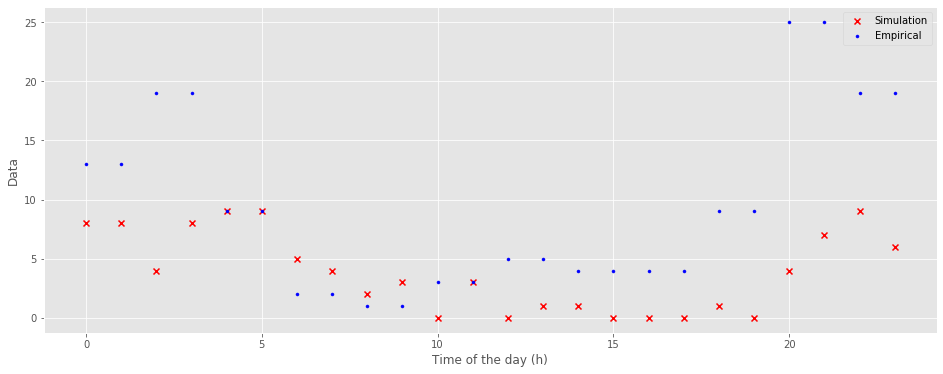

In [26]:
x = range(0,24)
plt.figure(figsize=((16,6)))
plt.scatter(x, expDF_Final.iloc[80].crimes_dist, marker='x', c='red', label='Simulation')
plt.xlabel('Time of the day (h)')
plt.ylabel('Data')
plt.scatter(x, empData, marker='.', c='blue', label='Empirical')
plt.legend()


Text(0, 0.5, 'Simulated Data')

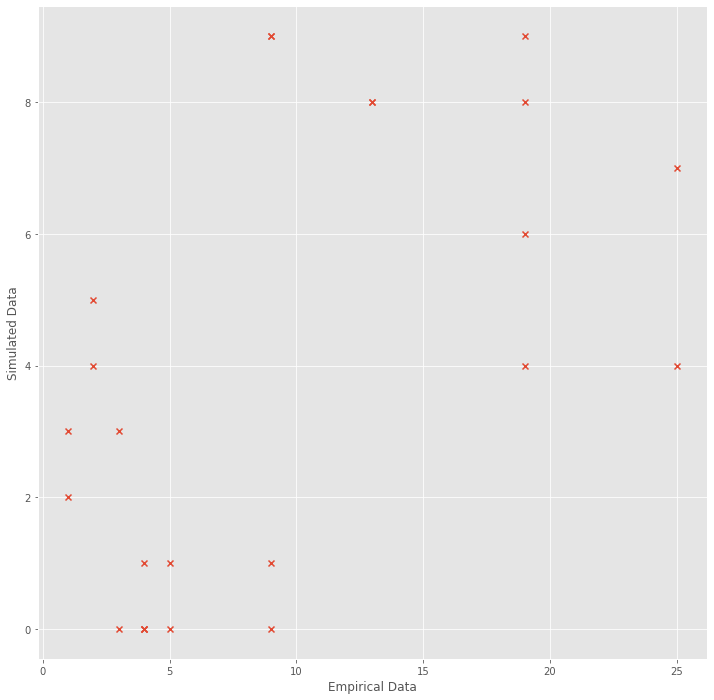

In [28]:
plt.figure(figsize=((12,12)))
plt.scatter(empData, expDF_Final.iloc[80].crimes_dist, marker='x')
plt.xlabel('Empirical Data')
plt.ylabel('Simulated Data')
